In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
get_ipython().magic('matplotlib inline')
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
#sns.set_theme(style="whitegrid")
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from sklearn.linear_model import LinearRegression
from pprint import pprint
import os
import pickle
import sys
import plotnine as p9
sys.path.append("/booleanfs/sahoo/scripts/")
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path.append("/booleanfs2/sahoo/BoNE")
import StepMiner as smn
import HegemonUtil as hu
from scipy.stats import hypergeom
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3     

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import gc_mod
reload(gc_mod)
import Utils as ut
import bone
reload(bone)

<module 'bone' from '/mnt/Users/sinha7290/public_html/BoNE/bone.py'>

In [2]:
import bone
reload(bone)
class IBDAnalysis(bone.IBDAnalysis):

    def __init__(self):
        bone.MacAnalysis.__init__(self)
   
 

    def getBos(self, tn=1, tb=0):
        self.prepareData("BC20", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Relapse')
        atypes = ['0', '1']
        ahash = {'1':1, '0':0}
        self.initData(atype, atypes, ahash)
        return
    
    def getbos(self, tn=1, tb=0):
        self.prepareData("BC20", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Brain relapses')
        atypes = ['0', '1']
        ahash = {'1':1, '0':0}
        self.initData(atype, atypes, ahash)
        return  

    
    def getmetabric(self, tn=1, tb=0):
        self.prepareData('BC36')
        atype = self.h.getSurvName('c ER.Expr')
        atypes = ['+', '-']
        ahash = {'+':0, '-':1}
        self.initData(atype, atypes, ahash)
        return 
    
    def getveer(self, tn=1, tb=0):
        self.prepareData("SS23", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('status')
        atypes = ['0', '1']
        ahash = {'0':0, '1':1}
        self.initData(atype, atypes, ahash)
        
    def getPG2020LungHam(self, tn=1, tb=0):
        self.prepareData("COV373", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName("c title")
        atype = [re.sub("[-_].*", "", str(k)) for k in atype]
        ahash = {}
        atypes = ['UN', '3', '4']
        if (tn == 2):
            atypes = ['UN', '3']
        if (tn == 3):
            atypes = ['3', '4']
        self.initData(atype, atypes, ahash)
        
    def getPG2020EIDD(self, tn=1, tb=1):
        self.prepareData("COV323")
        atype = self.h.getSurvName('c info')
        atypes = ['3', '4']
        ahash = {'3':0, '4':1}
        self.initData(atype, atypes, ahash)
        
    def getPG2020UN(self, tn=1, tb=1):
        self.prepareData("COV323")
        atype = self.h.getSurvName('c info')
        atypes = ['UN', 'IN']
        ahash = {'UN':0, '3':1}
        self.initData(atype, atypes, ahash)
        
        
    def getPG2020LungHs(self, tn=1, tb=1):
        self.prepareData("COV372")
        atype = self.h.getSurvName("c infection")
        atypes = ['Uninfected', 'infected']
        ahash = {'infected':1, 'Uninfected':0}
        self.initData(atype, atypes, ahash)
        
    def getKatsura2020at2CoV2(self, tn=1, tb=1):
        self.prepareData('COV370')
        atype = self.h.getSurvName("c infection status")
        atypes = ['C', 'CoV2']
        ahash = {'without infection':0, 'infected SARS-CoV-2':1}
        self.initData(atype, atypes, ahash)
        
    def getsorlie2001(self, tn=1):
        self.prepareData("BC1","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c "p53 status (0=wild type, 1=mutation, ND= not determined)"')
        atypes = ['0', '1']
        ahash = {'0':0, '1':1}
        self.initData(atype, atypes, ahash)
        
    def getsilva_muscle(self, tn=1):
        self.prepareData("MUSCLE007","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c source_name (ch1)')
        atypes = ['muscle, pretraining, resting state', 'muscle, posttraining, resting state']
        ahash = {'muscle, pretraining, resting state':0, 'muscle, posttraining, resting state':1}
        self.initData(atype, atypes, ahash)   
        
    def getYao2021IPF(self, tn=1, tb=0):
        self.prepareData("COV343","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName("c group")
        atypes = ['control', 'IPF']
        ahash = {'control':0, 'IPF':1}
        self.initData(atype, atypes, ahash)        

    def getYang2020(self, tn=1):
        self.prepareData("COV279")
        atype = self.h.getSurvName("c diagnosis")
        atypes = ['HC', 'IPF', 'CHP']
        ahash = {'chp':2, 'ipf':1, 'control':0}
        aval = [ahash[i] if i in ahash else None for i in atype]
        if (tn == 2):
            atype = self.h.getSurvName("c Sex")
            atypes = ['F', 'M']
            ahash = {'male':1, 'female':0}
        if (tn == 3):
            atype = self.h.getSurvName('c race (hispanic;1, black;3,asian;4, white;5, other;6)')
            atypes = ['W', 'B', 'A', 'O']
            ahash = {'5':0, '1':3, '3':1, '4':2, 'UNKNOWN':3, '6':3}
        self.initData(atype, atypes, ahash)        
        
        
    def getYao2020IPF(self, tn=1, tb=1):
        self.prepareData('COV268')
        atype = self.h.getSurvName("c group")
        atypes = ['control', 'IPF']
        ahash = {}
        self.initData(atype, atypes, ahash)
        
    def getYao2020bulk(self, tn=1, tb=1):
        self.prepareData('COV268')
        atype = self.h.getSurvName("c Cell Type")
        #ahash = {'IgG CTC chip': 0}
        ahash = {'bulk':0}
        hval = [1 if i in ahash else None for i in atype]         
        atype = self.h.getSurvName("c group")
        atypes = ['control', 'IPF']
        ahash = {}
        atype = [atype[i] if hval[i] == 1
                else None for i in range(len(atype))]   
        self.initData(atype, atypes, ahash)     
        
        
    def getXu2020CoV2(self, tn=1, tb=0):
        self.prepareData("COV339")
        atype = self.h.getSurvName("c disease condition")
        atypes = ['H', 'CoV', 'Hp', 'IPF', 'Ma', 'Ssa']
        ahash = {'Hypersensitivity pneumonitis':2,
                'Donor':0,
                'Idiopathic pulmonary fibrosis':3,
                'Myositis-associated interstitial lng disease':4,
                'Systemic slcerosis-associated interstitial lung disease':5, '':1}
        if (tn == 2):
            atypes = ['H', 'CoV', 'IPF']
            ahash = {'Donor':0, 'Idiopathic pulmonary fibrosis':2, '':1}
        if (tn == 3):
            atypes = ['H', 'CoV']
            ahash = {'Donor':0, '':1}
        if (tn == 4):
            atypes = ['H', 'IPF']
            ahash = {'Donor':0, 'Idiopathic pulmonary fibrosis':1}
        if (tn == 5):
            atypes = ['IPF', 'CoV']
            ahash = {'Idiopathic pulmonary fibrosis':0, '':1}
        self.initData(atype, atypes, ahash)        

    
def plotViolinBar(ana, desc=None):
    fig = plt.figure(figsize=(5,5), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig

def plotDensityBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    ax = ana.densityPlot(ax2, acolor)
    return fig

def processData(ana, l1, wt1, desc=None, violin=1):
    ana.orderData(l1, wt1)
    if (violin == 1):
        return plotViolinBar(ana, desc)
    return plotDensityBar(ana, desc)

def processDataDf(ana, l1, wt1, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)

    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig



def getRanksDf(df_e, df_t):
    expr = []
    row_labels = []
    row_ids = []
    row_numhi = []
    ranks = []
    g_ind = 0
    counts = []
    for k in range(len(df_e)):
        count = 0
        order = range(2, df_e[k].shape[1])
        avgrank = [0 for i in order]
        for j in range(df_e[k].shape[0]):
            e = df_e[k].iloc[j,:]
            t = df_t[k]['thr2'][j]
            if e[-1] == "":
                continue
            v = np.array([float(e[i]) if e[i] != "" else 0 for i in order])
            te = []
            sd = np.std(v)
            for i in order:
                if (e[i] != ""):
                    v1 = (float(e[i]) - t) / 3;
                    if sd > 0:
                        v1 = v1 / sd
                else:
                    v1 = -t/3/sd
                avgrank[i-2] += v1
                te.append(v1)
            expr.append(te)
            nm = getSName(e[1])
            row_labels.append(nm)
            row_ids.append(e[0])
            v1 = [g_ind, sum(v > t)]
            if g_ind > 3:
                v1 = [g_ind, sum(v <= t)]
            else:
                v1 = [g_ind, sum(v > t)]
            row_numhi.append(v1)
            count += 1
            #if count > 200:
            #    break
        ranks.append(avgrank)
        g_ind += 1
        counts += [count]
    print(counts)
    return ranks, row_labels, row_ids, row_numhi, expr

def processGeneGroupsDf(ana, l1, wt1, debug = 0, fthr = None):
    ana.orderDataDf(l1, wt1); print("ROC-AUC", ana.getMetrics())
    actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
    score = [ana.f_ranks[i - ana.start] for i in ana.i1]
    thr = hu.getThrData(score)
    nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/16
    if fthr is None:
        fthr = thr[0]
    if fthr == "thr0":
        fthr = thr[0] - nm
    if fthr == "thr2":
        fthr = thr[0] + nm
    if fthr == "thr3":
        fthr = thr[0] + 3 * nm
    print(thr)
    print(nm, fthr)
    predicted = [1 if ana.f_ranks[i - ana.start] >= fthr else 0 for i in ana.i1]
    c_dict = {}
    for i in ana.order:
        c_dict[i] = ana.f_ranks[i - ana.start]
        c_dict[i] = 0
        if ana.f_ranks[i - ana.start] >= fthr:
            c_dict[i] = 1
    fpr, tpr, thrs = roc_curve(actual, score)
    roc_auc = auc(fpr, tpr)
    if debug == 1:
        print(actual)
        print(predicted)
        print(score)
        print(thr[0], thr, nm)
        print("ROC-AUC", roc_auc)
        print('Accuracy', accuracy_score(actual, predicted))
        print(classification_report(actual, predicted, target_names=ana.atypes))
    return c_dict, fpr, tpr, roc_auc

def getOrder(ana, l1):
    from scipy.stats import fisher_exact, ttest_ind
    res = []
    for s in l1:
        for gn in s:
            id1 = ana.h.getBestID(ana.h.getIDs(gn).keys())
            if id1 is None:
                continue
            e = ana.h.getExprData(id1)
            v1 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[0]])
            v2 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[1]])
            t, p = ttest_ind(v1,v2,equal_var=False)
            res += [[id1, ana.h.getSimpleName(id1),
                   t, p, np.mean(v1)-np.mean(v2)]]
    return pd.DataFrame(res, columns=['ProbeID', 'Name', 'T', 'p', 'Diff'])
def plotVolcano(ana, genes, cfile, ylim=[0, 10.5], xlim=[-6, 6]):
    df = processGenes(ana.h, [ana.state[0], ana.state[1]], genes)
    df['Size'] = 10
    fig,ax = plt.subplots(figsize=(6,4), dpi=100)
    crcdf = pd.read_csv(cfile)
    crcdf['logp'] = -np.log10(crcdf['pvalue'])
    ax = sns.scatterplot('log2FoldChange', 'logp', size=0.1, color='0.8',
                         edgecolor="none", data=crcdf)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.legend().set_visible(False)
    import io
    import base64
    buffer = io.BytesIO()
    fig.savefig(buffer, format='jpg')
    buffer.seek(0)
    volcano = base64.b64encode(buffer.read())
    from PIL import Image, ImageDraw
    buffer.seek(0)
    img = Image.open(buffer)
    x = list(ax.bbox.bounds)
    x[2] = x[2] + x[0]
    x[3] = x[3] + x[1] - 2
    x[1] = x[1] - 2
    img = img.crop(x)

    fig,ax = plt.subplots(figsize=(6,4), dpi=100)
    ax = sns.scatterplot('Diff', 'logp', hue='Diff', palette='vlag',
                         data=df, size='Size', size_norm=(0, 10), 
                         edgecolor="none", zorder=2, ax=ax)
    ax.legend().set_visible(False)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    for i in df.index:
        ax.text(df['Diff'][i]+.02, df['logp'][i], str(df['Name'][i]))
    ax.imshow(img,
              aspect = ax.get_aspect(),
              extent = ax.get_xlim() + ax.get_ylim(),
              zorder = 1) #put the map under the heatmap
    return ax

def savePList(ofile, ana, l1):
    df = getOrder(ana, l1)
    df1 = df.sort_values(by=['T'], ascending=True)
    bone.saveList(ofile, df1['Name'])

def getSViP():
    l1 = [bone.readList("/booleanfs2/sahoo/Data/Macrophage/BN/covid/iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("/booleanfs2/sahoo/Data/Macrophage/BN/covid/list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

In [ ]:
df3

In [13]:
import bone
reload(bone)
ana = bone.MacAnalysis()
ana.getYang2020()#BULK

df = pd.DataFrame()
atype = ana.h.getSurvName('c diagnosis')
ahash = {'chp':1, 'ipf':1, 'control':0}
df['C1'] = [ahash[k] if k in ahash else None for k in atype]

wt1, l1 = bone.getViP()
ana.orderData(l1, wt1)
df['ViP'] = [None, None] + list(ana.f_ranks)
df['ViP'] = np.array(df['ViP']).astype(float)

wt1, l1 = bone.getSViP()
ana.orderData(l1, wt1)
df['sViP'] = [None, None] + list(ana.f_ranks)
df['sViP'] = np.array(df['sViP']).astype(float)

wt1, l1 = [1], [bone.getEntries('ipf/IPF signature_Bayesian 153 gene DOWN ONLY_PMID_21974901.txt', 0)]
ana.orderData(l1, wt1)
df['c1'] = [None, None] + list(ana.f_ranks)
df['PMID_21974901dn'] = np.array(df['c1']).astype(float)

wt1, l1 = [1], [bone.getEntries('ipf/IPF signature_Bayesian 153 gene UP ONLY PMID_21974901.txt', 0)]
ana.orderData(l1, wt1)
df['c2'] = [None, None] + list(ana.f_ranks)
df['PMID_21974901up'] = np.array(df['c2']).astype(float)

wt1, l1 = [1], [bone.getEntries('ipf/IPF signature_PMID_25029475.txt', 0)]
ana.orderData(l1, wt1)
df['c3'] = [None, None] + list(ana.f_ranks)
df['PMID_25029475'] = np.array(df['c3']).astype(float)

wt1, l1 = [[1, -1], [bone.getEntries("ipf/IPF signature_PMID_28484236.txt", 0)[1:16], bone.getEntries("ipf/IPF signature_PMID_28484236.txt", 0)[20:-2]]]
ana.orderData(l1, wt1)
df['c4'] = [None, None] + list(ana.f_ranks)
df['PMID_28484236'] = np.array(df['c4']).astype(float)

wt1, l1 = [[1, -1], [bone.getEntries("ipf/IPF signature_PMID_30998768.txt", 0)[1:5], bone.getEntries("ipf/IPF signature_PMID_30998768.txt", 0)[7:]]]
ana.orderData(l1, wt1)
df['c5'] = [None, None] + list(ana.f_ranks)
df['PMID_30998768'] = np.array(df['c5']).astype(float)

wt1, l1 = [[1, -1], [bone.getEntries("ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt", 0)[1:55], bone.getEntries("ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt", 0)[58:]]]
ana.orderData(l1, wt1)
df['c6'] = [None, None] + list(ana.f_ranks)
df['PMID_21974901'] = np.array(df['c6']).astype(float)


Yang 2020 lung (n = 288)
GSE150910 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV279
288 103 103 82 COV279
[153]
[17]
[66]
[60]
[12]
[13, 6]
[3, 10]
[45, 16]


In [14]:
df1 = bone.printOLS("C1 ~  ViP + sViP + PMID_21974901up + PMID_21974901dn + PMID_25029475 + PMID_28484236 + PMID_30998768 + PMID_21974901", df)
df1

                            OLS Regression Results                            
Dep. Variable:                     C1   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     88.70
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           4.01e-72
Time:                        13:19:15   Log-Likelihood:                -14.686
No. Observations:                 288   AIC:                             47.37
Df Residuals:                     279   BIC:                             80.34
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8391      0.079     

,Name,coeff,lower 0.95,upper 0.95,pvalues,codes
Intercept,Intercept,0.839127,0.683637,0.994617,2.322695e-22,***
ViP,ViP,0.002854,-0.000207,0.005914,6.748474e-02,.
sViP,sViP,-0.026807,-0.050642,-0.002972,2.764077e-02,*
PMID_21974901up,PMID_21974901up,-0.006375,-0.012470,-0.000281,4.039778e-02,*
PMID_21974901dn,PMID_21974901dn,-0.005361,-0.008922,-0.001799,3.309238e-03,**
PMID_25029475,PMID_25029475,0.065921,0.040051,0.091791,9.397812e-07,***
PMID_28484236,PMID_28484236,0.031576,0.011828,0.051323,1.824653e-03,**
PMID_30998768,PMID_30998768,0.044462,0.017611,0.071313,1.254132e-03,**
PMID_21974901,PMID_21974901,0.002569,-0.008032,0.013170,6.337328e-01,


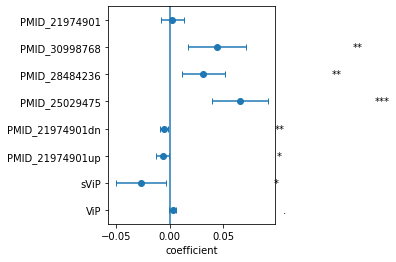

In [15]:
import bone
reload(bone)
df=df1
df = df.drop(['Intercept'])
#df = df.sort_values('pvalues',ascending=False)
plt.figure(figsize=(3,4))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3, color='tab:blue')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0, color='tab:blue')
#ax.set_xlim([0, 5.5])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
#ax.set_title("GSE122401")
pdf = getPDF("MV_bulk.pdf")
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [7]:
ana = bone.MacAnalysis()
#ana.getYang2020()#BULK
ana.getYao2020IPF()#SC
#ana.getYao2021IPF()
#ana.getShi2021GC()

#opts = {'Miranda.txt': [[1], [bone.getEntries("Miranda.txt", 0)]],
#        'test': [[1], [['ACTG1', 'MRPL57', 'ABLIM3', 'TCN1', 'PRKAG1', 'AKT1', 'CTNNA2', 'SCAF8']]]}

opts = {'sViP': bone.getSViP(),
        'ViP': bone.getViP(),
        'nejm': [[1, -1], [bone.getEntries("ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt", 0)[1:432], bone.getEntries("ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt", 0)[434:]]],
        '21974901_Down': [[1], [bone.getEntries("ipf/IPF signature_Bayesian 153 gene DOWN ONLY_PMID_21974901.txt", 0)]],
        '21974901_UP': [[1], [bone.getEntries("ipf/IPF signature_Bayesian 153 gene UP ONLY PMID_21974901.txt", 0)]],
        '21974901': [[1, -1], [bone.getEntries("ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt", 0)[1:55], bone.getEntries("ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt", 0)[58:]]],
        '25029475': [[1], [bone.getEntries("ipf/IPF signature_PMID_25029475.txt", 0)]],
        '28484236': [[1, -1], [bone.getEntries("ipf/IPF signature_PMID_28484236.txt", 0)[1:16], bone.getEntries("ipf/IPF signature_PMID_28484236.txt", 0)[20:-2]]],
        '30998768': [[1, -1], [bone.getEntries("ipf/IPF signature_PMID_30998768.txt", 0)[1:5], bone.getEntries("ipf/IPF signature_PMID_30998768.txt", 0)[7:]]]}

res = []
roc_auc_dict = {}
for i,(k,o) in enumerate(opts.items()):
    print(i,o[0])
    wt1, l1 = o[0],o[1]
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
    res += [[c_dict, fpr, tpr, roc_auc]]
    roc_auc_dict[k] = roc_auc

actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
data_list = { 'y': actual }
names = {}
rnames = {}
for i,o in enumerate(opts.keys()):
    id1 = 'c' + str(i)
    c = [res[i][0][j] for j in ana.i1]
    data_list[id1] = c
    names[id1] = o
    rnames[o] = id1
df1 = pd.DataFrame(data_list)

df = pd.DataFrame()
atype = ana.h.getSurvName('c Cell Type')
ahash = {'AT1':1, 'AT2':0, 'Epithelial':0, 'bulk':0}
df['AT1'] = [ahash[atype[i]] if atype[i] in ahash else None for i in ana.i1]
df_AT1 = df
df = pd.DataFrame()
atype = ana.h.getSurvName('c Cell Type')
ahash = {'AT1':0, 'AT2':1, 'Epithelial':0, 'bulk':0}
df['AT2'] = [ahash[atype[i]] if atype[i] in ahash else None for i in ana.i1]
df_AT2 = df
df = pd.DataFrame()
atype = ana.h.getSurvName('c Cell Type')
ahash = {'AT1':0, 'AT2':0, 'Epithelial':1, 'bulk':0}
df['Epi'] = [ahash[atype[i]] if atype[i] in ahash else None for i in ana.i1]
df_Epi = df
df = pd.DataFrame()
atype = ana.h.getSurvName('c Cell Type')
ahash = {'AT1':0, 'AT2':0, 'Epithelial':0, 'bulk':1}
df['bulk'] = [ahash[atype[i]] if atype[i] in ahash else None for i in ana.i1]
df_bulk = df
DF=pd.concat([df_AT1, df_AT2, df_Epi, df_bulk], axis=1)
#DF=pd.concat([df_AT1], axis=1)

df3=pd.concat([df1, DF], axis=1)
#df3

#bone.printOLS('y ~ c0 + c1', df3)

Yao 2020 ipf (n = 24)
GSE132914 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV268
24 12 12 0 COV268
0 [1]
[20]
ROC-AUC 0.83
[-16.29994086105208, 15.676204242170114, -16.79994086105208, -15.799940861052079]
0.46285691770470927 -16.29994086105208
x      False  True 
y                  
False      8      4
True       1     11
(22.0, 0.009422533315385652)
Fisher Exact pvalue = 0.009422533315385652
1 [1]
[161]
ROC-AUC 0.84
[-70.71683464734797, 28.109711771548763, -71.21683464734797, -70.21683464734797]
4.432103251609256 -70.71683464734797
x      False  True 
y                  
False     10      2
True       3      9
(15.0, 0.012278137799742368)
Fisher Exact pvalue = 0.012278137799742368
2 [1, -1]
[64, 0]
ROC-AUC 0.79
[-18.040078854819296, 18.53929825910779, -18.540078854819296, -17.540078854819296]
2.4865419959859665 -18.040078854819296
x      False  True 
y                  
False     10      2
True      10      2
(1.0, 1.0)
Fisher Exact pvalue = 1.0
3 [1]
[70]
ROC-AUC 0.41
[-

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     19.73
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.04e-05
Time:                        13:12:50   Log-Likelihood:                 19.953
No. Observations:                  24   AIC:                            -13.91
Df Residuals:                      11   BIC:                             1.409
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9370      0.699      1.341      0.2

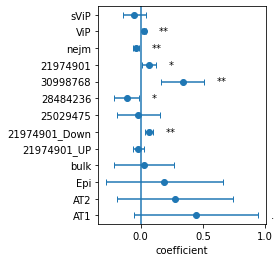

In [8]:
#reg_str = 'y ~ ' + ''.join(['c' + str(i) + ' + ' for i in range(len(names))][1:]) + 'c0'
#df2 = bone.printOLS(reg_str, df1)
df2 = bone.printOLS('y ~ AT1 + AT2 + Epi + bulk + c4 + c3 + c6 + c7 + c8 + c5 + c2 + c1 + c0', df3)

#df2 = bone.printOLS('y ~ c0', df3)
df = df2
df = df.drop(['Intercept'])
#df["Name"] = ['2','4','11-2-4', '7-13-14', '11-2-14', '11-4-14','1-8-3','14',]
df = df.replace({'Name':names})
#df = df.sort_values('coeff',ascending=True)
plt.figure(figsize=(3,4))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3, color='tab:blue')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0, color='tab:blue')
#ax.set_xlim([0, 5.5])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
#ax.set_title("GSE122401")
pdf = getPDF("MV_SC.pdf")
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

print('ROC-AUC:')
for k in df['Name'].tolist()[::-1]:
    if k in roc_auc_dict:
        print(f'{k}:', rnames[k], np.round(roc_auc_dict[k],2))